In [239]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [240]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [241]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [242]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [243]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [244]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [245]:
def huber_loss(labels, predictions, delta=1.0):
    diff = tf.abs(labels - predictions)
#     return tf.where(diff <= delta, 0.5 * diff**2, delta * (diff - 0.5 * delta))
    return tf.cond(tf.less_equal(diff, delta), 
                   lambda: tf.multiply(0.5, tf.square(diff)), 
                   lambda: tf.multiply(delta, tf.subtract(diff, tf.multiply(0.5, delta))))

In [246]:
loss = huber_loss(Y, Y_predicted, 0.07)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [247]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [248]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [249]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [250]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

Epoch 0: 2.3381564028206325
Epoch 1: 2.3047944562775746
Epoch 2: 2.2714325070735955
Epoch 3: 2.2380705408397175
Epoch 4: 2.2047085525645387
Epoch 5: 2.174231105528417
Epoch 6: 2.1460898717244468
Epoch 7: 2.1179486158348264
Epoch 8: 2.089807500796659
Epoch 9: 2.0616663226059506
Epoch 10: 2.033525153284981
Epoch 11: 2.0053840307962325
Epoch 12: 1.9772428636040007
Epoch 13: 1.9491017006692433
Epoch 14: 1.920960470324471
Epoch 15: 1.8928192144348508
Epoch 16: 1.8646779188088007
Epoch 17: 1.8365366558233898
Epoch 18: 1.808395388580504
Epoch 19: 1.7802540986310869
Epoch 20: 1.7521128406127293
Epoch 21: 1.723971581884793
Epoch 22: 1.6958303245760145
Epoch 23: 1.6676890271760167
Epoch 24: 1.6395477439676012
Epoch 25: 1.6114064588078432
Epoch 26: 1.5832652240282012
Epoch 27: 1.5581161081790924
Epoch 28: 1.53614451966825
Epoch 29: 1.5141728183343297
Epoch 30: 1.4922010189010984
Epoch 31: 1.4702292350786073
Epoch 32: 1.4482574577310257
Epoch 33: 1.4286669756596286
Epoch 34: 1.413403962162279
Epoc

Step 9: output the values of w and b

In [251]:
w, b = sess.run([w, b])

Step 10: plot the results

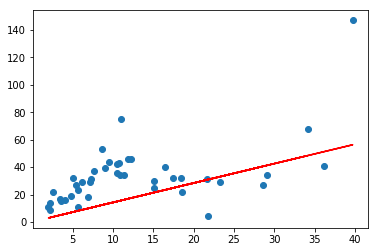

In [252]:
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.show()